In [1]:
import numpy as np
from scipy import stats
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
from matplotlib.transforms import Bbox
import plotly.graph_objects as go
import pickle as pkl
import keras
import os
from GraphFuncsV3 import*
import time

Folder ConFormer_1.0e-03_15_1_3 already exists


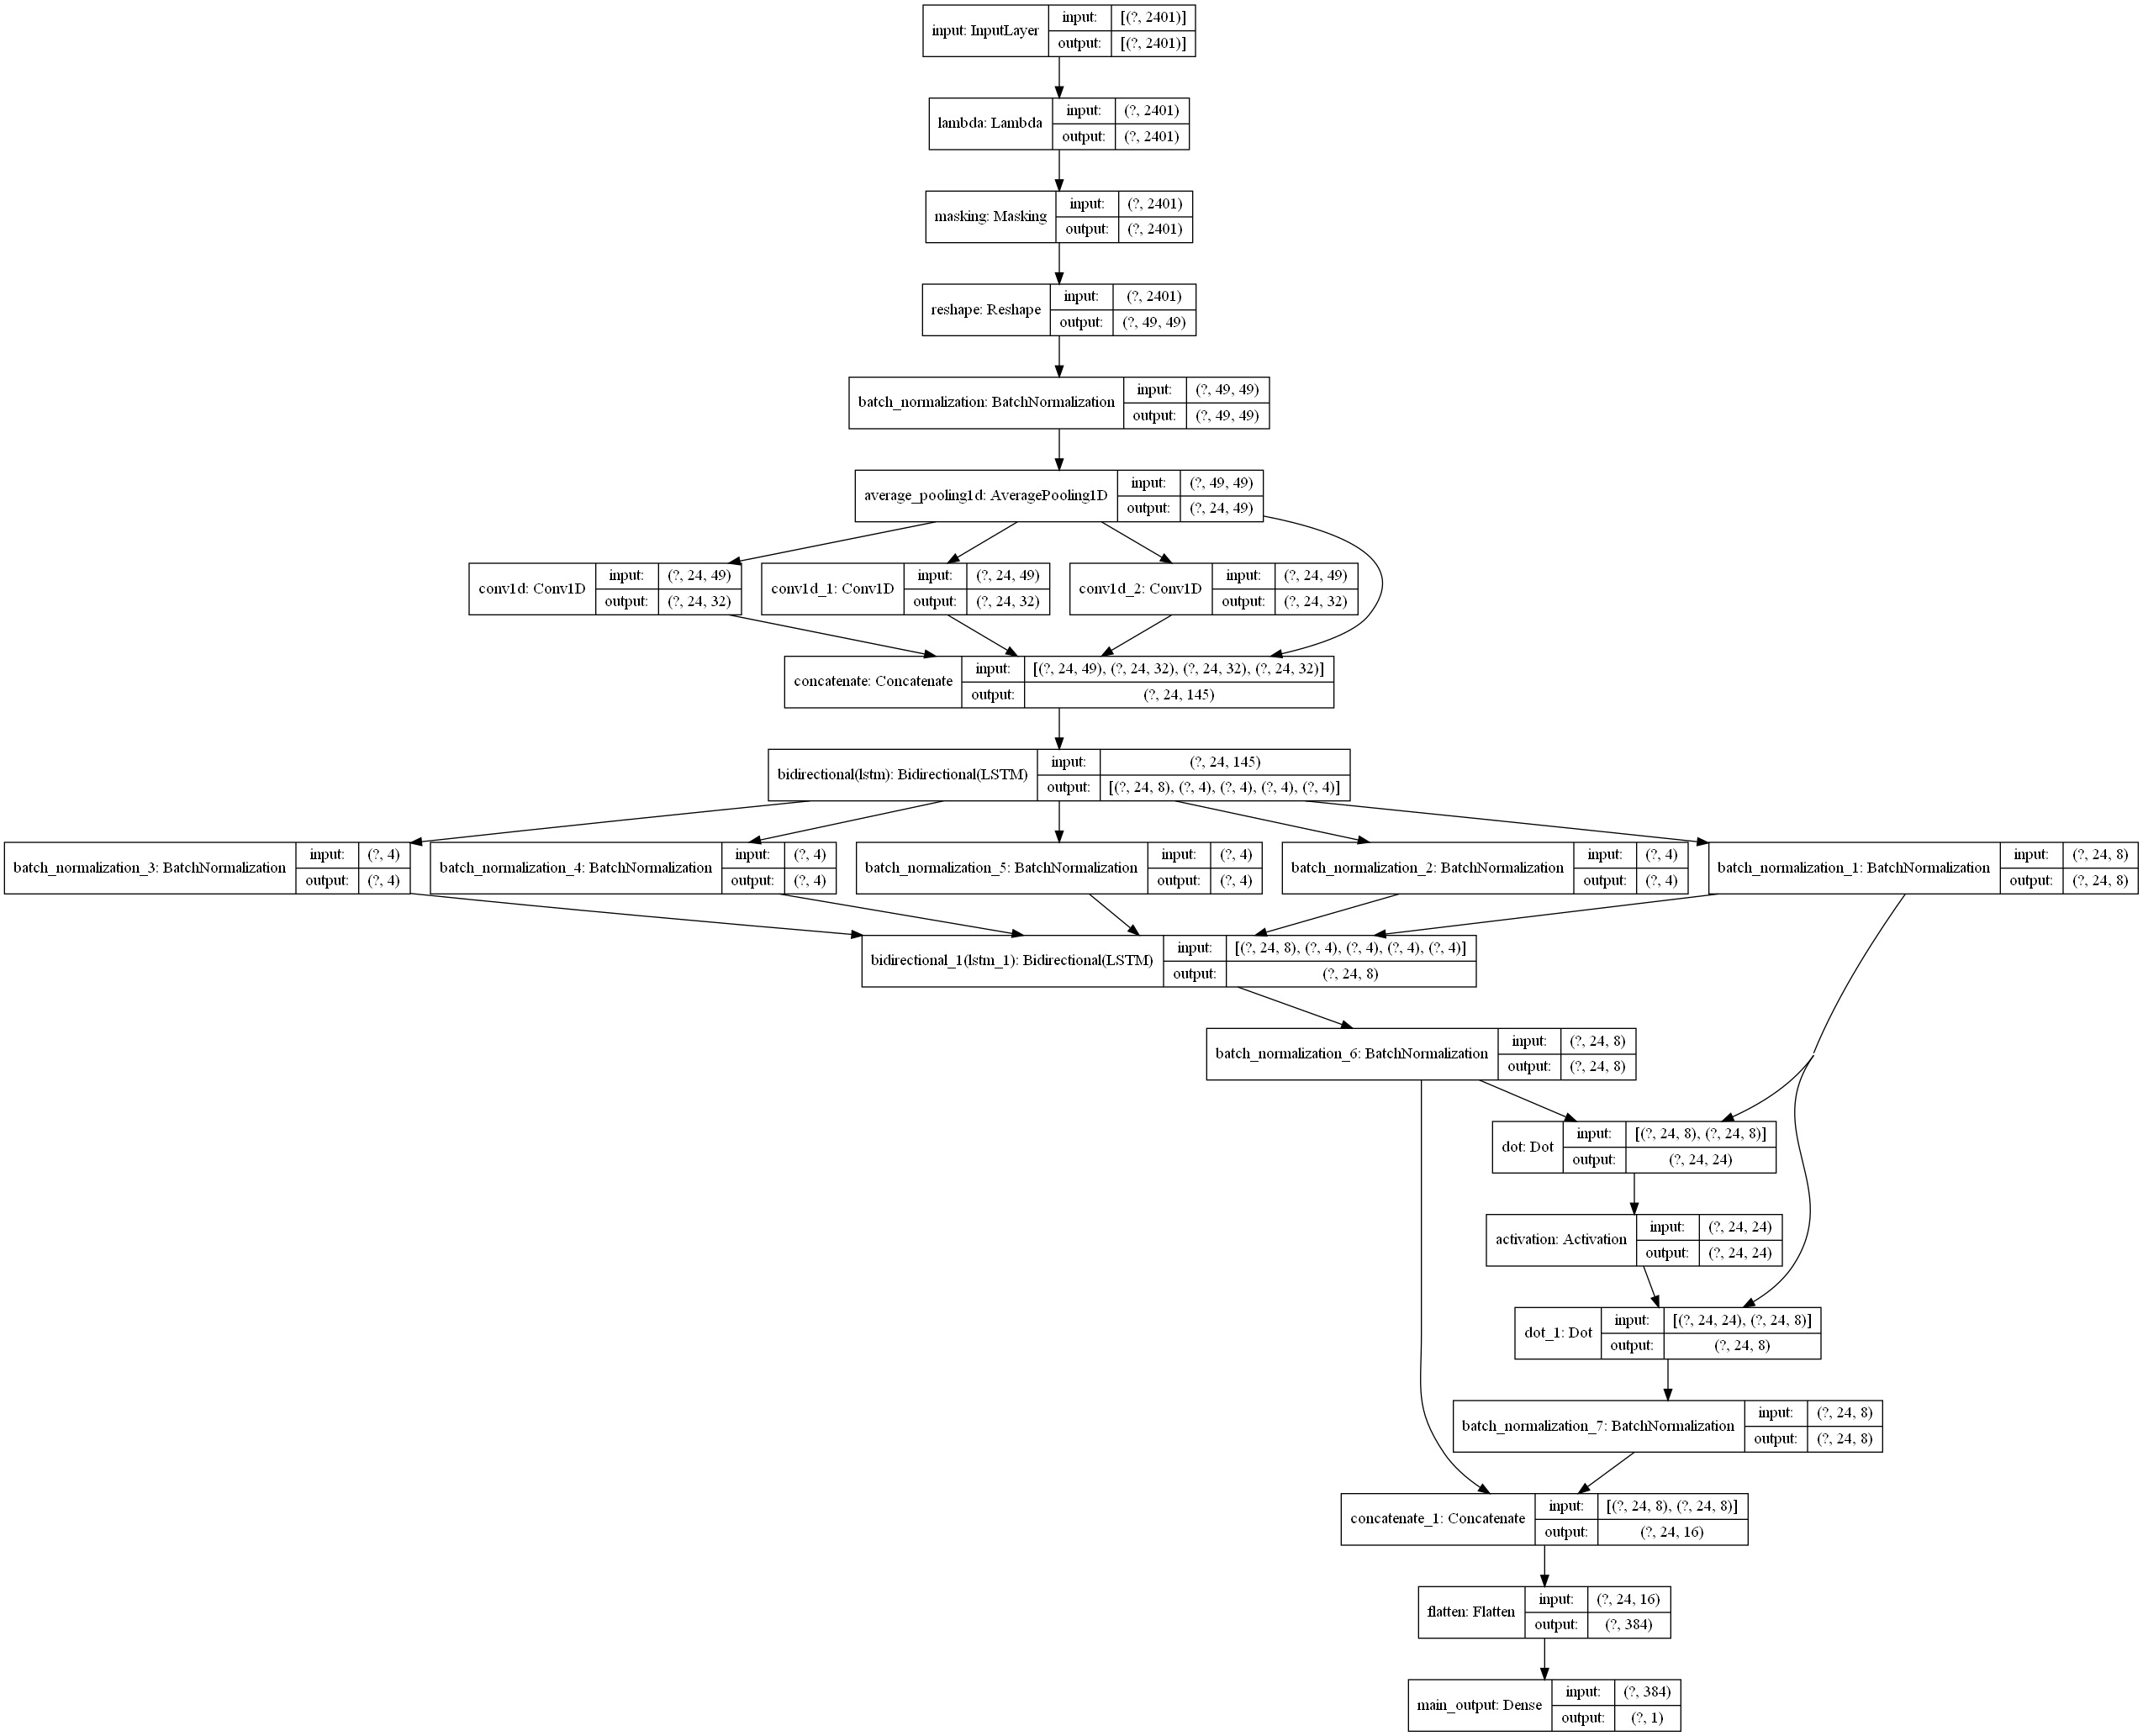

In [2]:
modelname = 'ConFormer_1.0e-03_15_1_3'
model = keras.models.load_model('./results/%s.h5' % modelname)
try:
    os.mkdir("./results/Plots/%s" % modelname)
except OSError:
    print("Folder %s already exists" % modelname)
keras.utils.plot_model(model, './results/Plots/%s.png' % modelname, show_shapes=True)

In [3]:
#Create folders for plots
try:
    os.mkdir("./Plots/%s" % modelname)
    os.mkdir("./Plots/%s/Model" % modelname)
    os.mkdir("./Plots/%s/Model/Single Model" % modelname)
    os.mkdir("./Plots/%s/Comparison" % modelname)
    os.mkdir("./Plots/%s/Comparison/Single Model" % modelname)
    os.mkdir("./Plots/%s/Analytical" % modelname)
    os.mkdir("./Plots/%s/Analytical/Single Model" % modelname)
except OSError:
    print("Folder %s already exists" % modelname)

In [4]:
savedir = "./results/"
yscaler = pkl.load(open(savedir + "yscaler", "rb"))
testin = pkl.load(open(savedir + "testin", "rb"))
testout = pkl.load(open(savedir + "testout", "rb"))

In [5]:
true = testout.numpy()
seconds = time.time()
print(seconds)
pred = model.predict(testin)
seconds2 = time.time()
print(seconds2)
print(len(testin.numpy()))
true = yscaler.inverse_transform(true)
pred = yscaler.inverse_transform(pred)

1634088423.5645285
1634088436.4975
25000


In [6]:
varname = [
#            "Amplitude", 
#            "Decay Coefficient", 
#            "Spherical Aberration", 
#            "Astigmatism", 
#            "Principal Axis Angle", 
           "Defocus", 
#            "Detuning"
           ]
bins = 10

# for i in range(len(varname)):
#     lower, upper = getlowerupper(pred[:,i], true[:,i])
#     histo(modelname, true[:,i], pred[:,i], varname[i], lower, upper, bins)
#     sems, resmeans, lowerranges, upperranges, lowerbounds, upperbounds, samples = \
#     plotgaussian(modelname, true[:,i], pred[:,i], varname[i], lower, upper, bins)
#     rmsplot(modelname, true[:,i], pred[:,i], varname[i], lower, upper, bins)
#     heatmap(modelname, true[:,i], pred[:,i], varname[i], lower, upper, bins)
#     confinttable(modelname, varname[i], sems, resmeans, lowerranges, upperranges, lowerbounds, upperbounds, samples)

In [7]:
print(type(pred[0][0]))

<class 'numpy.float32'>


In [8]:
bins = 10
space = 'Single Model'

for i in range(len(varname)):
    lower, upper = getlowerupper(pred[:,i], true[:,i])
    
#     preds = np.array([chisquare_pred[:,i], pred[:,i]])
    preds = np.array([pred[:,i]])
    
#     prednames = ['Analytical', 'ML Model']
    prednames = ['ML Model']
    
    heatmap(modelname, 
            'Model', 
            space, 
            true[:,i], 
            pred[:,i], 
            varname[i], 
            lower, 
            upper, 
            bins)
    
    resmeans, stddevs, bincenters, samples, resmean, std = \
    plotgaussian(modelname, 
                 'Model', 
                 space, 
                 true[:,i], 
                 pred[:,i], 
                 varname[i], 
                 lower, 
                 upper, 
                 bins)
    
    confinttable(modelname, 
                 space, 
                 'Model', 
                 resmean, 
                 std, 
                 varname[i], 
                 sum(samples), 
                 lower, 
                 upper)